In [1]:
import numpy as np
import cmath
import scqubits as scq
import matplotlib.pyplot as plt

import chencrafts.toolbox as tb
import chencrafts.cqed as cqed

import qutip as qt

from fluxonium_tunable_coupler import FluxoniumTunableCouplerGrounded, ConstructFullPulse

scq.settings.PROGRESSBAR_DISABLED = True
import chencrafts
chencrafts.settings.PROGRESSBAR_DISABLED = True


In [2]:
def FTC_system(
    E_Ja, E_Jb, 
    E_Ca, E_Cb, 
    E_La, E_Lb,
    E_C, ECm, E_L1, E_L2, E_J,
    flux_a, flux_b, flux_c, 
    **kwargs
):
    FTC_grounded = FluxoniumTunableCouplerGrounded(
        EJa=E_Ja, EJb=E_Jb, EC_twoqubit=np.inf,
        ECq1=E_Ca, ECq2=E_Cb, ELa=E_La, ELb=E_Lb,
        flux_a=flux_a, flux_b=flux_b, flux_c=flux_c,
        fluxonium_cutoff=130, fluxonium_truncated_dim=5,
        ECc=E_C, ECm=ECm, EL1=E_L1, EL2=E_L2, EJC=E_J,
        fluxonium_minus_truncated_dim=7, h_o_truncated_dim=4
    )

    return FTC_grounded


In [3]:
para_exp = {
    'E_Ja': 4.6,
    'E_Jb': 5.5,
    'E_Ca': 0.9,
    'E_Cb': 0.9,
    'E_J': 3,
    'E_C': 16.686114352392064,
    'ECm': 50,
    'E_L2': 2,
    'E_L1': 2,
    'E_La': 0.21,
    'E_Lb': 0.21,
}
FTC_grounded = FTC_system(
    **para_exp,
    flux_a = 0.5-0.009437772685386703,
    flux_b = 0.5+0.009437772685386703,
    flux_c = 0.2571857828682075,
)

In [4]:
(8*100/1.105)**0.25

5.187187268631479

In [5]:
FTC_grounded.fluxonium_minus()

Fluxonium(**{'EJ': 3, 'EC': 14.299999999999999, 'EL': 1.105, 'flux': 0.2571857828682075, 'cutoff': 130, 'truncated_dim': 7, 'id_str': 'fluxonium_minus', 'evals_method': None, 'evals_method_options': None, 'esys_method': None, 'esys_method_options': None})

In [ ]:
FTC_grounded.find_off_position_and_flux_shift_exact()

(0.2647067359584053, 0.017650558773382286)

In [7]:
eigvals = FTC_grounded.eigenvals()
eigvals = eigvals - eigvals[0]
eigvals

array([0.      , 0.195753, 0.198696, 0.396393, 4.460397, 4.657434])

In [9]:
FTC_grounded.flux_c = 0.
flux_s = FTC_grounded.find_flux_shift_exact()
FTC_grounded.flux_a = 0.5 + flux_s
FTC_grounded.flux_b = 0.5 - flux_s

# Calculate eigenvalues and normalize
eigvals = FTC_grounded.eigenvals()
eigvals = eigvals - eigvals[0]

(FTC_grounded.J_eff_total())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.00050D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.001D-01
  F =  0.10005015987086630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


-0.016931237806713

In [10]:
eigvals

array([0.      , 0.02981 , 0.070241, 0.10005 , 4.401776, 4.437522])

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming FTC_grounded is an object from your model
# Initialize lists to store results
flux_c_values = np.linspace(0, 0.5, 20)  # 100 points from 0 to 0.5
eigvals_list = []
J_list = []
J_pluss = []
J_minuss = []
# Loop over flux_c values
for flux_c in flux_c_values:
    FTC_grounded.flux_c = flux_c
    flux_s = FTC_grounded.find_flux_shift_exact()
    FTC_grounded.flux_a = 0.5 + flux_s
    FTC_grounded.flux_b = 0.5 - flux_s
    
    # Calculate eigenvalues and normalize
    eigvals = FTC_grounded.eigenvals()
    eigvals = eigvals - eigvals[0]
    
    # Store the first four eigenvalues
    eigvals_list.append(eigvals[:4])
    J_list.append(FTC_grounded.J_eff_total())
    result = FTC_grounded.J_eff_seperate()
    J_pluss.append(result[0])
    J_minuss.append(result[1])

# Convert to numpy array for easy plotting
eigvals_array = np.array(eigvals_list)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.00050D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.001D-01
  F =  0.10005015987086630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.9

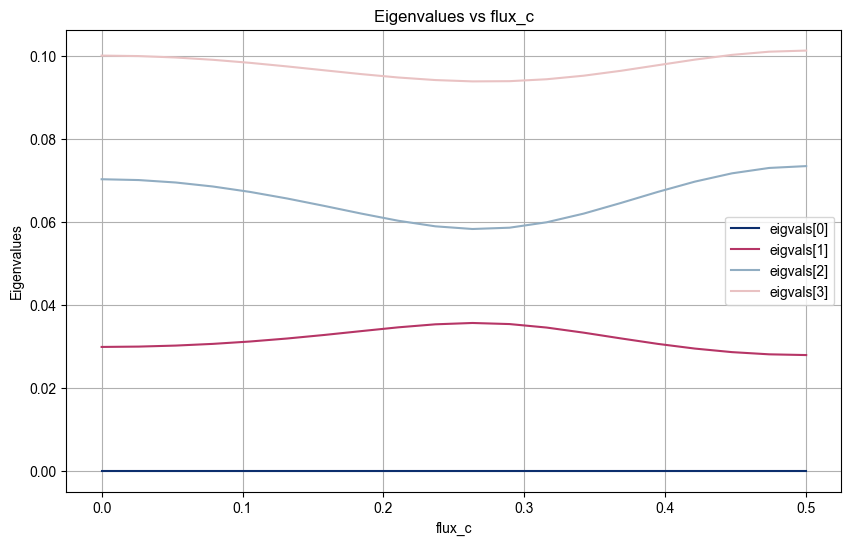

In [59]:
# Plotting the first four eigenvalues vs flux_c
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(flux_c_values, eigvals_array[:, i], label=f'eigvals[{i}]')
plt.xlabel('flux_c')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues vs flux_c')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
J_list

[-0.016931237806713,
 -0.016756060866958564,
 -0.016230722495907006,
 -0.015356023193406758,
 -0.014134047983859909,
 -0.012569313837467087,
 -0.01067040568361237,
 -0.008452099731145291,
 -0.005937925495357751,
 -0.003163033076745149,
 -0.00017710465729549912,
 0.002953115764168765,
 0.006142277865099511,
 0.009286606803697086,
 0.012266569565678724,
 0.014952588440544642,
 0.01721389188447525,
 0.018929866128214776,
 0.020002444415631267,
 0.020367424161169576]

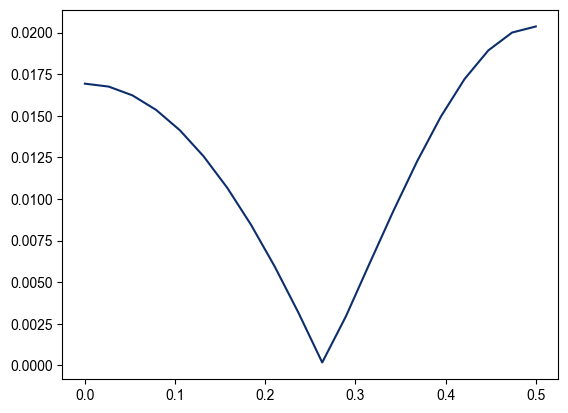

In [71]:

plt.plot(flux_c_values, abs(np.array(J_list)))
plt.show()

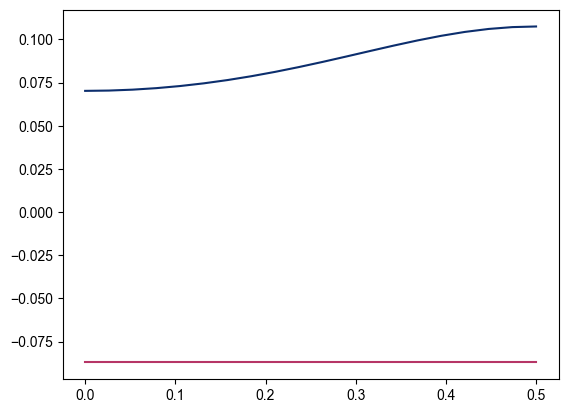

In [65]:
plt.plot(flux_c_values, J_minuss)
plt.plot(flux_c_values, J_pluss)
plt.show()